# Crohn Report

Data source: [Alterations in Lipid, Amino Acid, and Energy Metabolism Distinguish Crohn Disease from Ulcerative Colitis and Control Subjects by Serum Metabolomic Profiling](https://doi.org/10.1007/s11306-017-1311-y)

In [1]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:.2g}'.format)

In [2]:
from sklearn_utils.utils import SkUtilsIO, filter_by_label

X, y = SkUtilsIO('../datasets/crohn_analysis_with_std.json', gz=True).from_json()
X_crohn, y_crohn = filter_by_label(X, y, 'Ulcerative Colitis', reverse=True)

In [3]:
from metabolitics.preprocessing import MetaboliticsPipeline

pre = MetaboliticsPipeline([
    'reaction-diff', 
    'feature-selection', 
    'pathway-transformer', 
    'transport-pathway-elimination'
])
pre.named_steps['feature-selection'].named_steps['skb'].transformer.set_params(k=750)

X_crohn_pathways = pre.fit_transform(X_crohn, y_crohn)

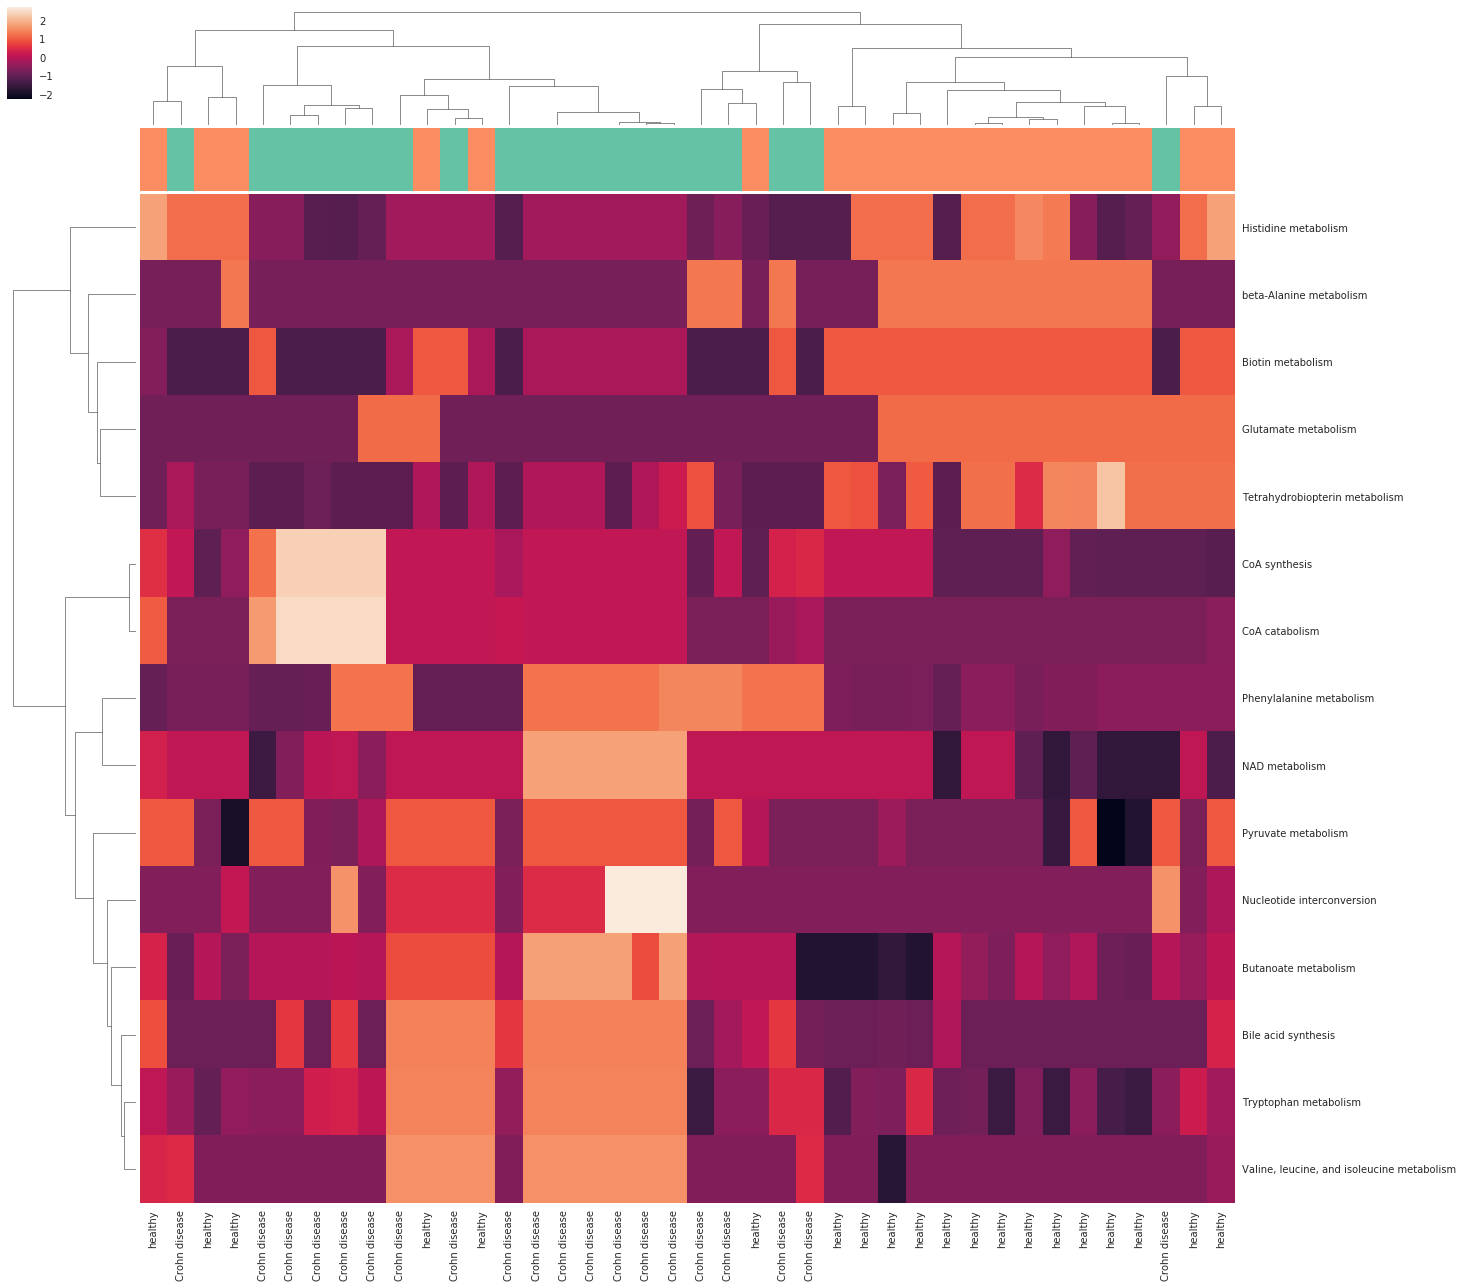

In [4]:
%matplotlib inline

from sklearn_utils.visualization import plot_heatmap

plot_heatmap(X_crohn_pathways, y_crohn, top_n=15)

In [15]:
from sklearn_utils.utils import feature_importance_report

df = feature_importance_report(X_crohn_pathways, y_crohn)

df['ref'] = ['[%d]' % (i + 1) if i < 10 else '-' for i in range(len(df))]

df

labels,Crohn disease,healthy,F,pval,ref
Phenylalanine metabolism,8.7e+02,1.2e-14,20,0.0037,[1]
CoA synthesis,4.7e+02,-3.7e-14,16,0.0064,[2]
Biotin metabolism,-7.8e+02,1.1e-14,15,0.0064,[3]
Glutamate metabolism,-1e+03,6.8e-14,13,0.0071,[4]
CoA catabolism,3.1e+02,-2.4e-14,13,0.0071,[5]
Tetrahydrobiopterin metabolism,-7.5e+02,-9.7e-14,13,0.0071,[6]
Histidine metabolism,-4.9e+02,-3.4e-14,13,0.0071,[7]
Tryptophan metabolism,3.1e+02,2.8e-15,10,0.015,[8]
Butanoate metabolism,3.4e+02,-2.8e-15,9.9,0.016,[9]
Pyruvate metabolism,2.6e+02,-7.8e-14,9.4,0.018,[10]


In [6]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([
            ('dy', pre),
            ('vect', DictVectorizer(sparse=False)),
            ('pca', PCA()),
            ('clf', LogisticRegression(C=0.3e-6, random_state=43))
        ])

In [7]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

kf = StratifiedKFold(n_splits=10, random_state=43)

scores = cross_val_score(pipe, X_crohn, y_crohn, cv=kf, n_jobs=-1, scoring='f1_micro')
print('kfold test: %s' % scores)
print('mean: %s' % scores.mean().round(3))
print('std: %s' % scores.std().round(3))

kfold test: [1.   1.   0.75 0.75 1.   1.   0.75 1.   0.5  1.  ]
mean: 0.875
std: 0.168


## References

[1]

[2]

[3]

[4]

[5]

[6]

[7]

[8]

[9]

[10]